In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
 df[df['_STATE'].isin([9,34,36])].head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [6]:
# your code here
df['_STATE'].unique()

array([ 9., 34., 36.])

Now check to see how large our subset df.

In [7]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [8]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [9]:
#your code here

zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [10]:
df.shape

(34545, 358)

In [11]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [12]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [13]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

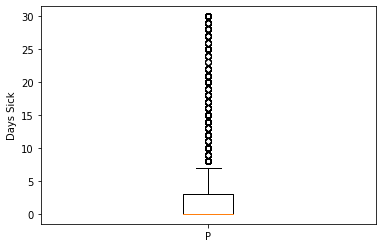

In [14]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot(df['PHYSHLTH'])

# Add x-axis tick labels:
ax.set_xticklabels('PHYSHLTH')

# Add a y-axis label
ax.set_ylabel("Days Sick")

plt.show()


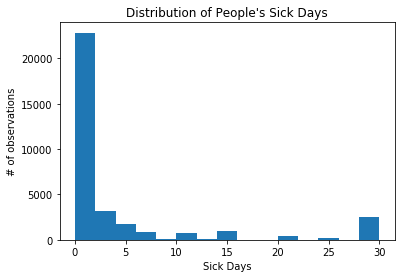

In [15]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['PHYSHLTH'], bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [16]:
# code to calculate the average number of sick days by state

df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [17]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']

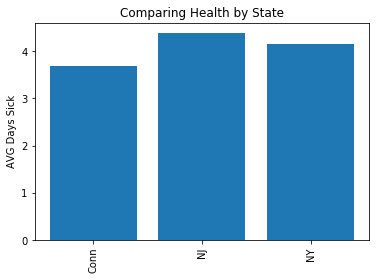

In [18]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(states, means)

# Set title and lables
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

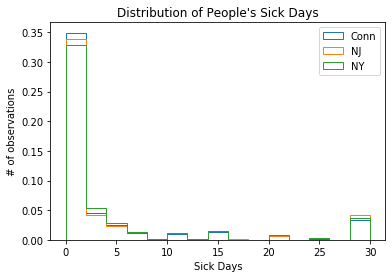

In [19]:
# graphic showing the histogram of data

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [20]:
def is_Chronic(df):
    if df['PHYSHLTH'] > 15:
        return 1
    else:
        return 0
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)

In [21]:
# code to create new colum for chronically sick

df['CHRONIC'] = np.where(df['PHYSHLTH']>=15, 1,0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [22]:
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC, dtype: float64

In [23]:
# code to calculate averages per state
chronic_means = df.groupby('_STATE')['CHRONIC'].mean().values
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC, dtype: float64

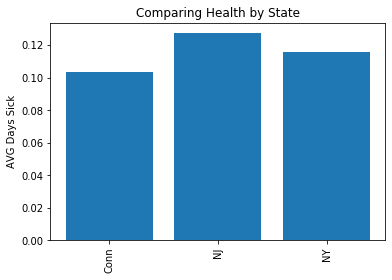

In [24]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chronic_means)

# Set labels and title
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [25]:
df.shape

(33747, 360)

In [26]:
df['SMOKDAY2'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [27]:
df['SMOKDAY2'].value_counts().sum()

13468

In [28]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])




In [29]:
df['smoking'].value_counts().sum()

32153

In [30]:
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])

In [31]:
df['smoking'].count()

32359

In [32]:
df['smoking'].describe()

count    32359.000000
mean         2.830217
std          0.700878
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [33]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

In [34]:
smoking_avg.index

Float64Index([3.0, 1.0, 2.0, 7.0, 9.0], dtype='float64')

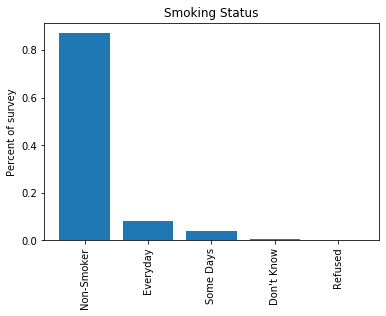

In [35]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [36]:
df.groupby(['_STATE', 'smoking'])['smoking'].count()

_STATE  smoking
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
        9.0          26
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
        9.0          14
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
        9.0          26
Name: smoking, dtype: int64

In [37]:
state_smoking = df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts = state_smoking.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [38]:
state_pcts

smoking
_STATE smoking           
9.0    1.0       7.052243
       2.0       3.436220
       3.0      88.602537
       7.0       0.649286
       9.0       0.259714
34.0   1.0       8.143529
       2.0       4.338395
       3.0      86.722704
       7.0       0.668836
       9.0       0.126537
36.0   1.0       8.897554
       2.0       4.537398
       3.0      86.086494
       7.0       0.248139
       9.0       0.230415

In [39]:
state_pcts.unstack()

smoking                                         
smoking       1.0       2.0        3.0       7.0       9.0
_STATE                                                    
9.0      7.052243  3.436220  88.602537  0.649286  0.259714
34.0     8.143529  4.338395  86.722704  0.668836  0.126537
36.0     8.897554  4.537398  86.086494  0.248139  0.230415

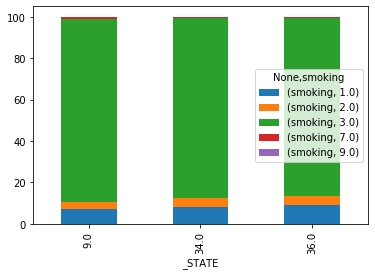

In [40]:
state_pcts.unstack().plot(kind='bar', stacked=True)

In [41]:
#your code here

zero_dict = {3:'non', 
            2: 'some',
            1: 'every',
            7: 'unknown',
            9: 'unknown'}

df['smoking_cat'] = df['smoking'].replace(zero_dict)

In [42]:
df['smoking_cat']

49938         non
49939         non
49940         non
49941         non
49942         non
           ...   
303774      every
303775        non
303776        non
303777    unknown
303778        non
Name: smoking_cat, Length: 33747, dtype: object

In [43]:
state_smoking_cat = df.groupby(['_STATE', 'smoking_cat']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts_cat = state_smoking_cat.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts_cat.index.set_levels(['Conn', 'NJ', 'NY'], level=0, inplace=True)
state_pcts_cat

smoking
_STATE smoking_cat           
Conn   every         7.052243
       non          88.602537
       some          3.436220
       unknown       0.909000
NJ     every         8.143529
       non          86.722704
       some          4.338395
       unknown       0.795372
NY     every         8.897554
       non          86.086494
       some          4.537398
       unknown       0.478554

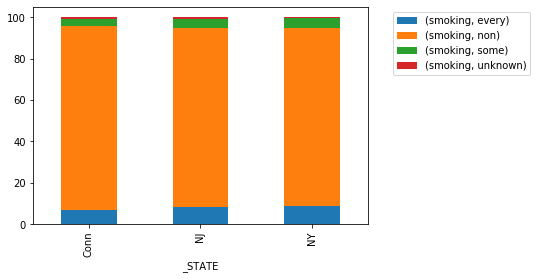

In [44]:
ax = state_pcts_cat.unstack().plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

In [45]:
cat_avg = df.groupby('smoking_cat')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking_cat')['PHYSHLTH'].std()
cat_avg

smoking_cat
every      6.653007
non        3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

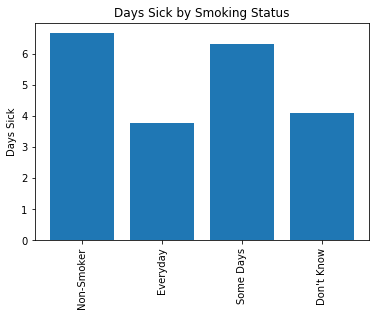

In [46]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], cat_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [47]:
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)



In [48]:
df['alcohol']

49938     101.0
49939     230.0
49940       0.0
49941     103.0
49942     101.0
          ...  
303774    203.0
303775      0.0
303776    204.0
303777      NaN
303778    230.0
Name: alcohol, Length: 33747, dtype: float64

In [49]:
# create a function called times100
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min((x-100)*4.34524, 30)
    else:
        return x

In [50]:
df['alcohol']= df['alcohol'].apply(calc_monthly)

In [51]:
df['alcohol'].describe()

count    31532.000000
mean         5.495244
std          8.423029
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


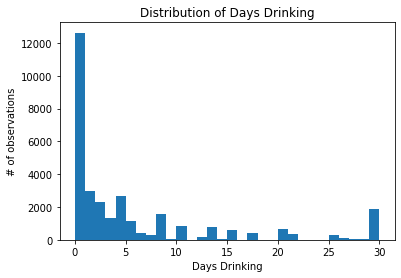

In [52]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [53]:
# code to calculate averages per state
alcohol_state = df.groupby('_STATE')['alcohol'].mean().values
df.groupby('_STATE')['alcohol'].mean()

_STATE
9.0     6.199627
34.0    5.057856
36.0    5.301178
Name: alcohol, dtype: float64

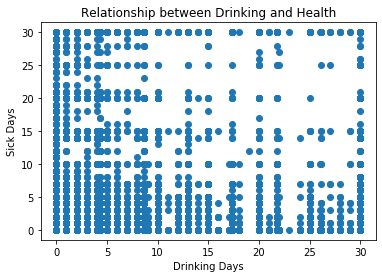

In [54]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["alcohol"], df["PHYSHLTH"])

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [55]:
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
alcohol    -0.091154
Name: PHYSHLTH, dtype: float64

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hypotheses below:

1. Smoking increases your chances of feeling sick more days. 

2. Alcohol has no affect on the number of days you feel sick.

3.  People in NJ are less healty than people in Conn.

## Statistical Tests 

Below are a number of questions that test the topics covered over the last 3 days. After reading each question, determine the correct satistic or correct statistical stest for each question. After doing your calculations, be sure to still answer the question.  

1) What is the average number of sick days per person in this sample?

In [56]:
sampleM = df['PHYSHLTH'].mean()
sampleM

4.085340919192817

2) What is the standard deviation of the number of sick days in this sample?

In [57]:
sampleStd = df['PHYSHLTH'].std()
sampleStd

8.513292652404095

3) Describe the distribution of sick days (normal or not, skewness, kurtosis).
Positive Skewness, 

Skewness = 2.2888051759296246
kurtosis = 3.915412964186044
Positivly skewed


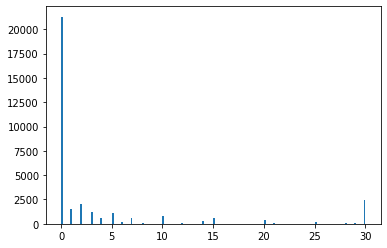

In [78]:
plt.hist(df.PHYSHLTH, bins='auto')
print ('Skewness =', skew(df.PHYSHLTH))
print ('kurtosis =', kurtosis(df.PHYSHLTH))
print ('Positivly skewed')

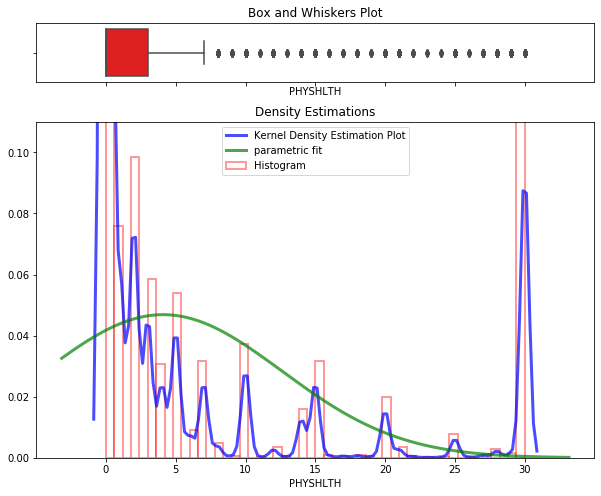

In [79]:
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kurtosis, skew
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(df.PHYSHLTH, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=df.PHYSHLTH, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .08))
plt.ylim(0,0.11)
plt.legend();

4) What is the probability of getting this sample mean (average number of sick days), if the population mean is 4?

In [80]:
import math
pop_m = 4
ns_std = sampleStd/math.sqrt(len(df['PHYSHLTH']))
ns_std


0.04634255533573233

5) Create a 95% confidence interval for the average number of sick days per person.

In [81]:
from scipy.stats import norm

In [82]:
#z = norm.interval(.95)
z = 1.96
z

1.96

In [83]:
def conf_interval(sample):
    sample_size = len(df['PHYSHLTH'])
    moe = z * (sampleM/sampleStd)
    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (sampleM - moe, sampleM + moe)
    
    return z, moe, conf

# Call above function with sample
z_critical, margin_of_error, confidence_interval = conf_interval(df['PHYSHLTH'])
    

print("Z value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)

Z value:
1.96

Margin of error
0.940560665368026

Confidence interval:
(3.1447802538247913, 5.0259015845608435)


6) What proportion of the population is considered chronically sick?

In [84]:
x_barC = df.CHRONIC.sum()/len(df.PHYSHLTH)
#x_barC = len(df.PHYSHLTH)/df.CHRONIC.sum()
x_barC

0.11595104750051856

In [85]:
SC = df['CHRONIC'].mean()
SSTD = df['CHRONIC'].std()
NS_STD = SSTD/math.sqrt(df['CHRONIC'].std())

Skewness = 2.3990598657509357
kurtosis = 3.755488239456896


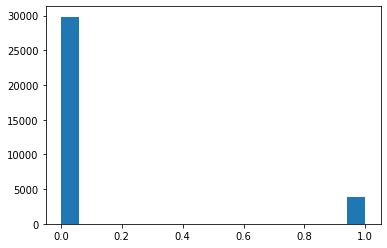

In [86]:
plt.hist(df.CHRONIC, bins='auto')
print ('Skewness =', skew(df.CHRONIC))
print ('kurtosis =', kurtosis(df.CHRONIC))

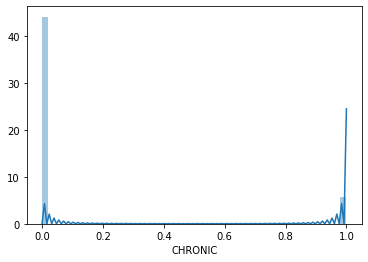

In [87]:
sns.distplot(df.CHRONIC)

7) Create a 95% confidence interval for the proportion of chronically sick people.

In [88]:
def conf_interval(sample):
    sample_size = x_barC
    moe = z * (x_barC*(1-x_barC)/len(df.CHRONIC))**(1/2)
    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (sample_size - moe, sample_size + moe)
    
    return z, moe, conf

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(sample)    
    
    

print("Z-critical value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)

NameError: name 'sample' is not defined

8) What is the probability of drawing this sample if the population proportion if chronically sick people is 0.10?

In [89]:
def conf_interval(sample):
    sample_size = 0.1
    moe = z * (sample_size*(1-sample_size)/len(df.CHRONIC))**(1/2)
    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (sample_size - moe, sample_size + moe)
    
    return z, moe, conf

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(df.CHRONIC)    
    
    

print("Z-critical value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)

Z-critical value:
1.96

Margin of error
0.0032008088585696115

Confidence interval:
(0.09679919114143039, 0.10320080885856962)


9) The CDC claims that the average American drinks 4.5 days a month. Joe, a student at UConn, thinks it is much higher. Perform a statistical test to support or reject Joe's claim. 

In [90]:
uconn = df.loc[df['_STATE'] == 9.0]['alcohol']
n_con = uconn.count()
x_bar_con = uconn.mean()
s_con = uconn.std()

In [93]:
std_con = s_con/np.sqrt(n_con)
std_con, s_con, x_bar_con

(0.08951017683156347, 8.835701850704034, 6.199626564039409)

In [96]:
z_con = (x_bar_con - 4.5)/std_con
z_con

18.988081849482835

In [97]:
z_con

18.988081849482835

In [98]:
z

1.96

In [101]:
def conf_interval(sample):
    sample_size = n_con
    moe = z_con * (x_bar_con/s_con)
    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    conf = (sample_size - moe, sample_size + moe)
    
    return z, moe, conf

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(n_con)    
    
    

print("Z-critical value:")              
print(z_critical)         
print ('\nMargin of error')
print(margin_of_error)
print("\nConfidence interval:")
print(confidence_interval)

Z-critical value:
1.96

Margin of error
13.323108749400415

Confidence interval:
(9730.6768912506, 9757.3231087494)


10) Do people in NJ have more sick days than people in Connecticut?

11) Is there a higher proportion of chronically sick people in NY compared to NJ?

12) Do people in Connecticut drink more than people in NY?

13) Is there a statistically significant difference in the percentage of men and women who are chronically sick?

14) Men are normally seen as heavier drinkers than women. Is there statistically significant evidence to support this idea?

15) Find another survey item to investigate and do each of the following:
    
- Create a confidence interval for the population mean or proportion.
- Perform a one sample z or t test on this data.
- Compare two of the states on this survey item.
- Compare the different sexes on this survey item. 

If their any problems tomorrow; Their are no trick questions. Slack Shaun Abu if their are questions. Also all the coaches are available on slack.